<a href="https://colab.research.google.com/github/thefortunetella/stock-prediction-rnn/blob/main/stock_prediction_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
# Fetch stock data
df = yf.download('NVDA', start='2016-01-01', end='2024-01-30')

# Show the data
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04    8.072500    8.145000    8.010000    8.092500    7.899906   
2016-01-05    8.245000    8.360000    8.125000    8.222500    8.026814   
2016-01-06    8.087500    8.125000    7.790000    7.882500    7.694905   
2016-01-07    7.685000    7.737500    7.470000    7.570000    7.389840   
2016-01-08    7.667500    7.675000    7.392500    7.407500    7.231208   
...                ...         ...         ...         ...         ...   
2024-01-23  595.700012  599.099976  585.849976  598.729980  598.701904   
2024-01-24  603.039978  628.489990  599.380005  613.619995  613.591187   
2024-01-25  623.500000  627.190002  608.500000  616.169983  616.141052   
2024-01-26  609.599976  617.830017  605.729980  610.309998  610.281372   
2024-01-29  612.320007  624.890015  609.070007  624.650024  624.620728   

              Volume  
Date          

In [ ]:
#get number of rows and columns indataset
df.shape

(2031, 6)

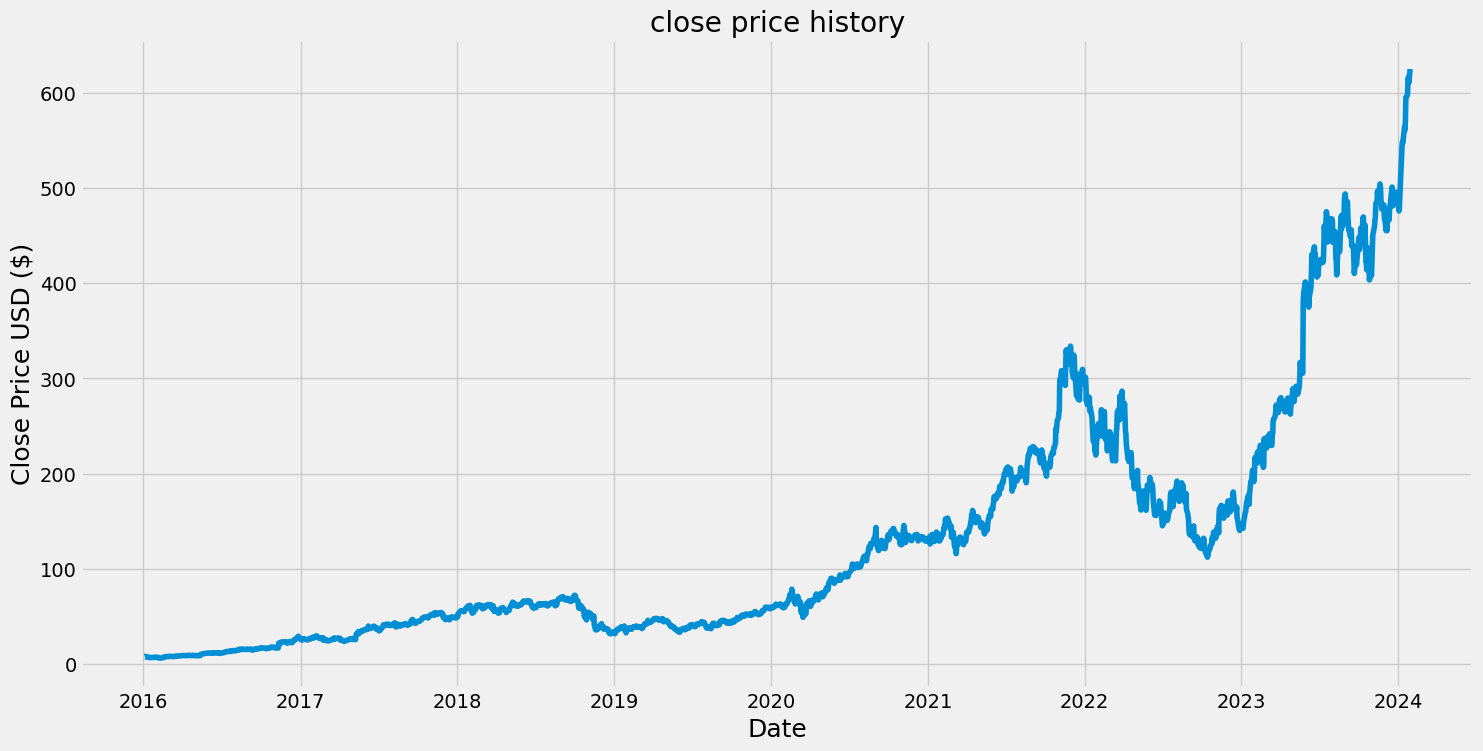

In [ ]:
#vizualize closing price history

plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot (df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create dataframe close column
data = df.filter(['Close'])
# Convert to numpy array
dataset = data.values
# Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1625

In [ ]:
#Scale data good practice
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00289078],
       [0.00310102],
       [0.00255117],
       ...,
       [0.98628591],
       [0.97680902],
       [1.        ]])

In [ ]:
#Create trainingdataset
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([2.89078077e-03, 3.10101956e-03, 2.55116526e-03, 2.04578398e-03,
       1.78298509e-03, 1.80320081e-03, 2.00535332e-03, 1.63339267e-03,
       1.39485264e-03, 7.64137020e-04, 8.53083847e-04, 9.13729447e-04,
       1.04310693e-03, 1.30590581e-03, 1.29377639e-03, 1.40698207e-03,
       1.26951830e-03, 1.14418319e-03, 1.64552210e-03, 1.64956447e-03,
       1.14822633e-03, 1.20482956e-03, 1.20887193e-03, 4.89209480e-04,
       0.00000000e+00, 1.09162542e-04, 8.49044560e-05, 3.23443711e-05,
       2.06195655e-04, 7.15620078e-04, 9.86504474e-04, 1.94875086e-03,
       2.11047272e-03, 2.54712211e-03, 2.57946648e-03, 2.66841331e-03,
       2.69671454e-03, 2.61181086e-03, 2.48243337e-03, 3.04441711e-03,
       3.12123451e-03, 3.00398722e-03, 2.96355580e-03, 2.87865211e-03,
       2.64011208e-03, 2.63202580e-03, 2.61181086e-03, 2.83013594e-03,
       2.86247954e-03, 2.79779080e-03, 3.18592325e-03, 3.07271834e-03,
       3.47298099e-03, 3.51341087e-03, 3.48915202e-03, 3.72364967e-03,
     

In [ ]:
#convert datasets above to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1565, 60, 1)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs= 1)

1565/1565 [==============================] - 46s 27ms/step - loss: 5.6442e-04


In [ ]:
#create testing dataset
#create new array with scaled values from index 1364 to 1719
test_data= scaled_data[training_data_len - 60:, :]
#create test datasets
x_test=[]
y_test= dataset[training_data_len,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert data to numpy array
x_test = np.array(x_test)

In [ ]:
#reshape to lstm format 3 dimentional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


13/13 [==============================] - 1s 16ms/step


In [ ]:
#get root mean sqrd error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

157.66689266712208

<ipython-input-108-535396d90d50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


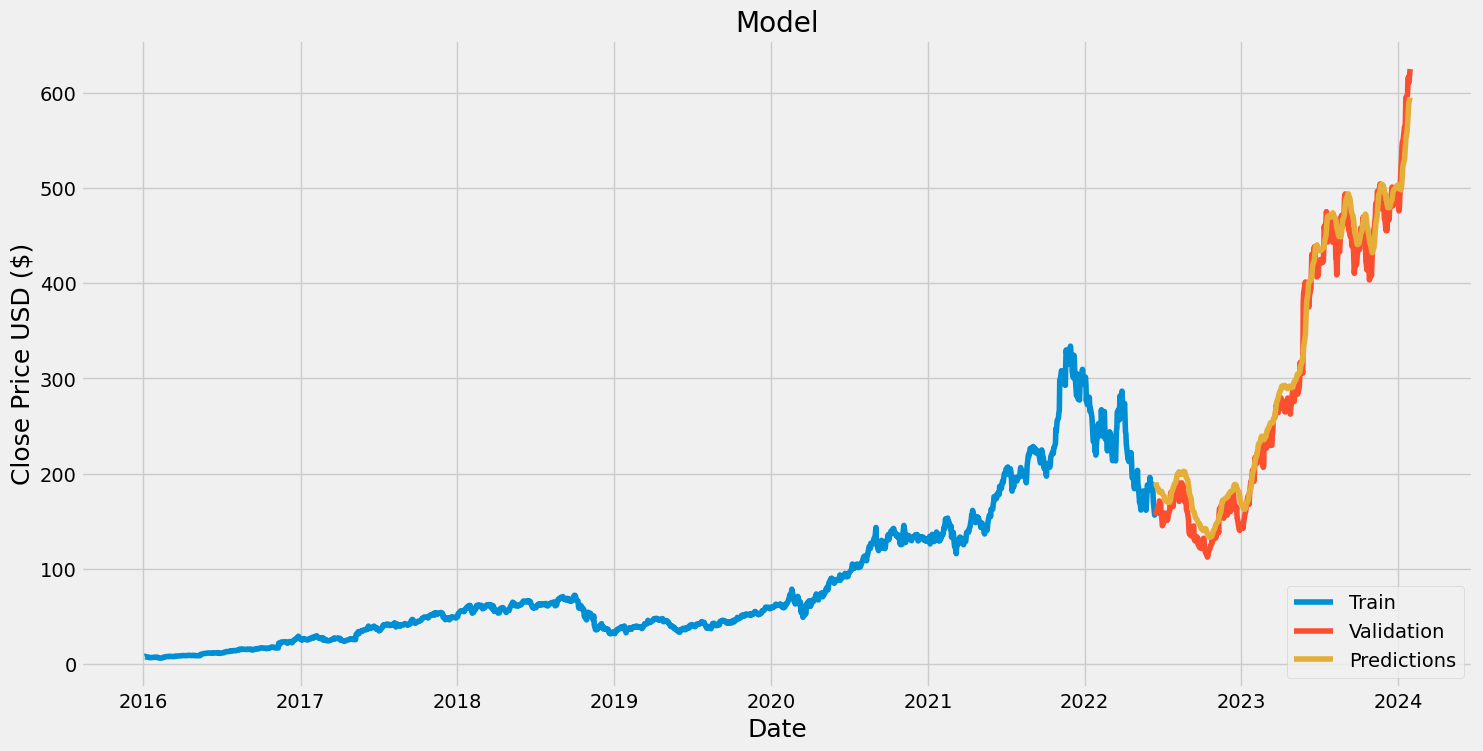

In [ ]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2022-06-16,156.009995,190.840683
2022-06-17,158.800003,187.261902
2022-06-21,165.660004,184.227036
2022-06-22,163.600006,182.452927
2022-06-23,162.250000,181.308777
...,...,...
2024-01-23,598.729980,567.599121
2024-01-24,613.619995,574.855652
2024-01-25,616.169983,582.401794
